In [28]:
import pandas as pd
data=pd.read_csv(r'C:\Users\ASUS\Downloads\CC GENERAL.csv')
data.head()

data.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [29]:
data.isnull().sum()


CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [30]:
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].mode().item(),inplace=True)

In [31]:
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mode().item(),inplace=True)

In [32]:
data.drop(['CUST_ID'], axis=1,inplace=True)


In [33]:
data.isnull().sum()


BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [34]:
data.isnull().sum()


BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [35]:
from sklearn.cluster import AgglomerativeClustering #Importing our clustering algorithm : Agglomerative
model=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
clust_labels=model.fit_predict(data)  #Applying agglomerative algorithm with 5 clusters, using euclidean distance as a metric


In [36]:
data['cluster'] = clust_labels

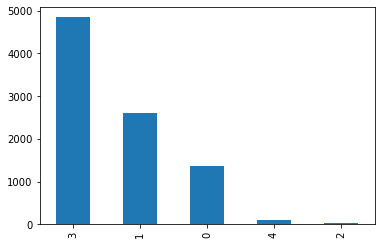

In [37]:
data.cluster.value_counts().plot(kind='bar')

Text(0.5, 1.0, 'Customer clustering')

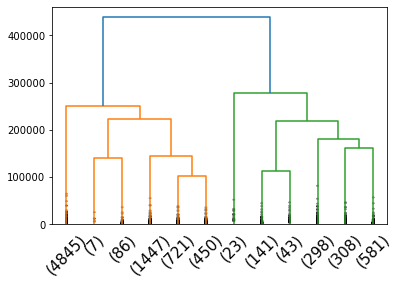

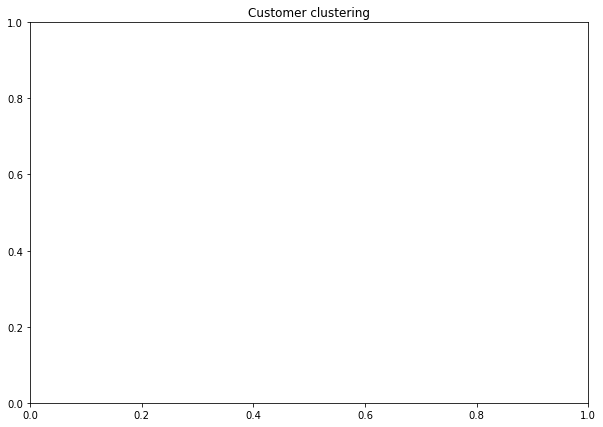

In [38]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram,linkage
z=linkage(data,"ward")
dendrogram(z,truncate_mode= "lastp", p =12, leaf_rotation=45,leaf_font_size=15, show_contracted=True)
plt.figure(figsize=(10,7))
plt.title("Customer clustering")




In [45]:
from sklearn.cluster import KMeans  #Importing our clustering algorithm: KMeans
kmeans=KMeans(n_clusters=5, random_state=0)  #Cluster our data by choosing 5 as number of clusters
kmeans.fit(data)
labels=pd.DataFrame(kmeans.labels_)
labels

,0
0,0
1,3
2,4
3,4
4,0
...,...
8945,0
8946,0
8947,0
8948,0


[[8.36638557e+02 8.52450540e-01 5.13646260e+02 2.50798678e+02
  2.63139567e+02 5.18993150e+02 4.51231569e-01 1.33100385e-01
  3.45502805e-01 1.12878342e-01 2.39031239e+00 9.61705862e+00
  2.31332700e+03 9.21209431e+02 5.16401196e+02 1.46055098e-01
  1.13832924e+01 2.71639172e+00]
 [4.74238647e+03 9.26988635e-01 1.34554481e+04 9.59629156e+03
  3.85938573e+03 3.81121966e+03 8.41761344e-01 6.89599125e-01
  6.80681823e-01 1.55066260e-01 7.04166667e+00 1.00354167e+02
  1.30364583e+04 1.90446534e+04 2.57959250e+03 3.85151708e-01
  1.19583333e+01 4.79166667e-01]
 [4.05814769e+03 9.88636375e-01 1.02737875e+03 1.18389464e+02
  9.08989286e+02 9.22757849e+02 4.71320321e-01 3.92315536e-02
  4.41152625e-01 1.05654714e-01 3.01785714e+00 1.86250000e+01
  4.26785714e+03 1.62493914e+03 2.27600316e+04 1.48808929e-03
  1.19107143e+01 3.78571429e+00]
 [6.06634064e+03 9.62583360e-01 1.11589292e+03 6.54209546e+02
  4.61772764e+02 4.93766959e+03 3.91675469e-01 2.02685758e-01
  2.92708089e-01 3.95024778e-01 1

In [47]:
plt.scatter(data["BALANCE"][data.labels_ == 0],          
            data["PURCHASES"][data.labels_ == 0],s=80,c='magenta',label='Careful')
plt.scatter(data["BALANCE"][data.labels_ == 1],
           data["PURCHASES"][data.labels_ == 1],s=80,c='yellow',label='Standard')
plt.scatter(data["BALANCE"][data.labels_ == 2],
           data["PURCHASES"][data.labels_ == 2],s=80,c='green',label='Target')
plt.scatter(data["BALANCE"][data.labels_ == 3], 
           data["PURCHASES"][data.labels_ == 3],s=80,c='cyan',label='Careless')
plt.scatter(data["BALANCE"][data.labels_ == 4], 
           data["PURCHASES"][data.labels_ == 4],s=80,c='burlywood',label='Sensible')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')
plt.legend()
plt.show()

AttributeError: 'DataFrame' object has no attribute 'labels_'

In [49]:
import sklearn.metrics as sm
sm.accuracy_score(labels,kmeans.labels_)

1.0

In [51]:
sm.accuracy_score(clust_labels)

TypeError: accuracy_score() missing 1 required positional argument: 'y_pred'